In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(xtrain, _), (xtest, _) = fashion_mnist.load_data() #_used for a name which doesnt matter and isnt needed

In [ ]:
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

print (xtrain.shape)
print (xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
xtrain = xtrain[..., tf.newaxis] # adds new axis
xtest = xtest[..., tf.newaxis]


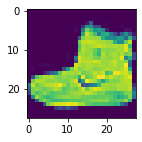

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(tf.squeeze(xtrain[0]))  #tf.squeeze to visualize after adding new axis

In [ ]:
noise_factor=0.2
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy, clip_value_min=0.0, clip_value_max=1.0) #clips values around specified values
xtest_noisy = tf.clip_by_value(xtest_noisy, clip_value_min=0.0, clip_value_max=1.0)


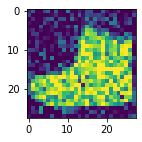

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(tf.squeeze(xtrain_noisy[0]))

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Input


class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Sequential([
            Input(shape=(28,28,1)),
            Conv2D(16, (3,3), activation='relu', padding='same', strides=2),  #16 is number of filters, 3,3 is size of filters
            Conv2D(8, (3,3), activation='relu', padding='same', strides=2),

        ]) 
        
        self.decoder = Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
            Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size= (3,3), activation='sigmoid', padding='same')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        

In [ ]:
model = Autoencoder()

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')

In [ ]:
model.fit(xtrain_noisy, xtrain,
         epochs=7,
         validation_data=(xtest_noisy, xtest))

Epoch 1/7
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0167 - val_loss: 0.0098
Epoch 2/7
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 3/7
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 5/7
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 6/7
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/7
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0074 - val_loss: 0.0074


In [ ]:
enoded_result = model.encoder(xtest_noisy).numpy()
decoded_result = model.decoder(enoded_result).numpy()



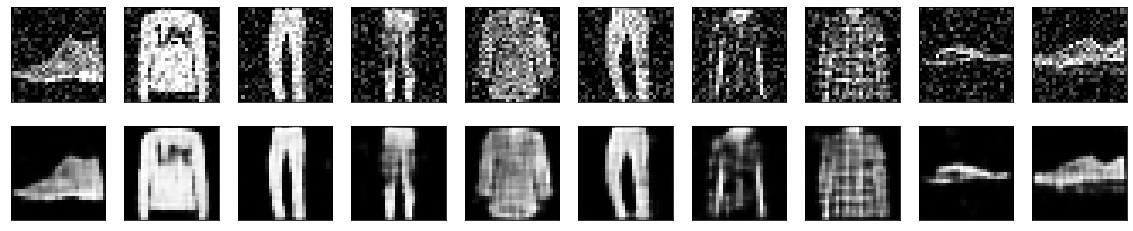

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(xtest_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(decoded_result[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
tf.squeeze

omdena.com/blog/applying-cnns/